The focus of this notebook is to investigate the problem landscape.
It can also be used to investigate the benefits and disadvantages of GBJ backjumping.

In [1]:
from exact_solver import solve, solve_stp
from problem_generator import generate_problem 

from matplotlib import pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from problem_sets import SIMPLE, BINARY

In [3]:
# syntax for overriding a value.
_ = generate_problem(**{ **SIMPLE, 'variables': 15 } )

Consider the general trend on the big picture

0 100.0 10.0
10 80.0 17.0
20 80.0 19.2
30 40.0 30.6
40 20.0 36.2
50 20.0 35.4
60 0.0 36.6
70 0.0 40.6
80 0.0 43.0
90 0.0 39.4
100 0.0 39.4
0 100.0 12.0
10 100.0 17.4
20 80.0 28.4
30 20.0 40.4
40 0.0 39.8
50 0.0 52.2
60 0.0 43.8
70 0.0 51.4
80 0.0 46.6
90 0.0 52.6
100 0.0 54.6
0 100.0 14.0
10 100.0 21.4
20 20.0 46.8
30 0.0 57.8
40 0.0 59.0
50 0.0 63.0
60 0.0 50.6
70 0.0 55.4
80 0.0 53.8
90 0.0 58.6
100 0.0 57.4
0 100.0 16.0
10 80.0 30.0
20 20.0 50.4
30 20.0 55.0
40 0.0 53.4
50 0.0 67.8
60 0.0 66.6
70 0.0 59.8
80 0.0 71.4
90 0.0 62.6
100 0.0 70.2
0 100.0 18.0
10 60.0 42.0
20 0.0 70.6
30 0.0 65.4
40 0.0 63.4
50 0.0 74.2
60 0.0 74.6
70 0.0 67.8
80 0.0 67.8
90 0.0 70.6
100 0.0 76.2


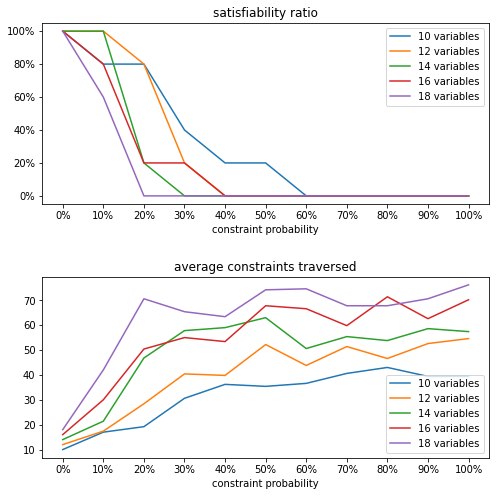

In [25]:
fig, axs = plt.subplots(2, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')

runs = 5
for variables in range(10, 20, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    for prob in range(0, 101, 10):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            sat = solve(
                T, backjump=False, stats=stats
            )
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()

Now zoom in on the interesting part.

In [9]:
runs = 20
for variables in range(10, 20, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    for prob in range(6, 20, 1):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        for run in range(runs):
            T = generate_problem(**{ **SIMPLE , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            sat = solve(
                T, stats
            )
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()

6 100.0 12.15
7 100.0 11.95
8 100.0 12.85
9 100.0 13.75
10 90.0 14.95
11 95.0 13.75
12 95.0 14.65
13 90.0 16.05
14 75.0 19.5
15 100.0 15.05
16 90.0 16.2
17 90.0 17.2
18 100.0 15.5
19 85.0 18.25
6 100.0 15.05
7 100.0 15.9
8 100.0 15.85
9 85.0 19.2
10 85.0 20.05
11 100.0 17.55
12 90.0 20.55
13 90.0 20.5
14 95.0 19.9
15 85.0 22.45
16 65.0 27.85
17 60.0 28.6
18 60.0 27.6
19 65.0 27.5
6 95.0 19.3
7 100.0 19.15
8 90.0 22.5
9 85.0 23.75
10 90.0 23.7
11 90.0 23.35
12 85.0 26.1


KeyboardInterrupt: 

Now let's consider another problem set, such as BINARY.

0 100.0 6.0
20 100.0 7.6
40 100.0 11.05
60 100.0 13.2
80 80.0 41.7
100 75.0 49.7
0 100.0 8.0
20 100.0 13.1
40 95.0 24.15
60 85.0 64.35
80 40.0 163.45
100 10.0 309.7
0 100.0 10.0
20 100.0 18.65
40 80.0 228.0
60 40.0 539.65
80 5.0 953.2


KeyboardInterrupt: 

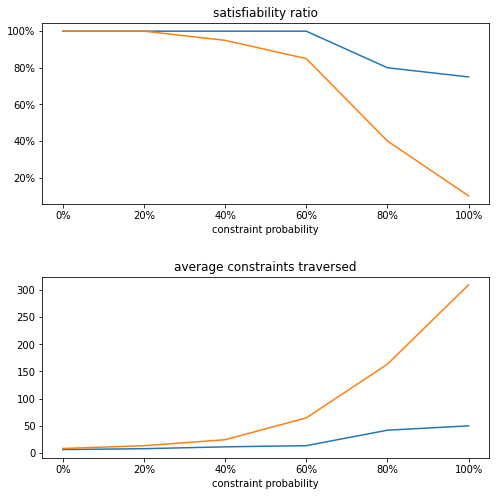

In [13]:
fig, axs = plt.subplots(2, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')

runs = 20
for variables in range(6, 11, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    for prob in range(0, 101, 20):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 'variables': variables, 'constraint_probability': prob/100})
            stats = {}
            sat = solve(
                T, stats
            )
            constr_cnt += stats['total']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()

Btw, what happens if we make the problems much harder to satisfy?
(code copied from BINARY, big picture. changed interval scaling)
(this is also a pseudo-check for backjumping)

0 100.0 6.0 0.0
20 100.0 7.85 0.0
40 75.0 16.65 0.35870151968550135
60 25.0 33.2 1.1989632650631106
80 0.0 51.15 1.30277715207887
100 0.0 36.0 1.6398190045248875
0 100.0 8.0 0.0
20 80.0 18.3 0.41133333333333333
40 40.0 81.25 1.1476578468700034
60 5.0 87.6 1.4815306811418838
80 0.0 95.55 1.6779012897348469
100 0.0 49.4 2.0585285307961447
0 100.0 10.0 0.0
20 65.0 44.3 0.7231381226940953
40 0.0 176.25 1.5524952261128333
60 0.0 168.65 1.6401145434800468
80 0.0 191.05 2.084886723795379
100 0.0 60.5 2.4686864219371962


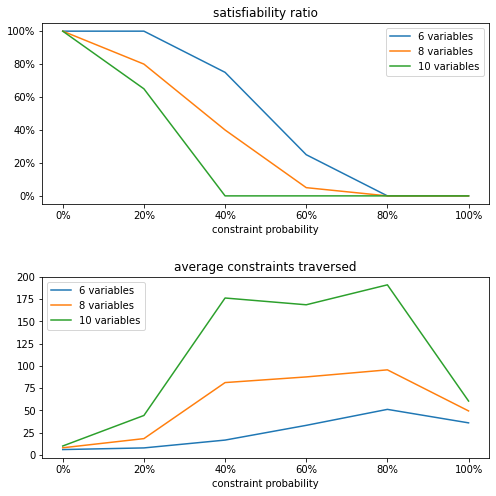

In [28]:
fig, axs = plt.subplots(2, figsize=(8, 8))
fig.subplots_adjust(hspace=0.4)
axs[0].yaxis.set_major_formatter(mtick.PercentFormatter())
axs[0].set_xlabel('constraint probability')
axs[0].set_title('satisfiability ratio')
axs[1].set_xlabel('constraint probability')
axs[1].set_title('average constraints traversed')

runs = 20
for variables in range(6, 11, 2):
    x_axis = []
    graph = []
    constraints_traversed = []
    for prob in range(0, 101, 20):
        x_axis.append(f'{prob}%')

        cnt = 0
        constr_cnt = 0
        backjump_distance_cnt = 0
        for run in range(runs):
            T = generate_problem(**{ **BINARY , 
                                    'variables': variables, 
                                    'constraint_probability': prob/100,
                                    'scaling_factor': 0.1})
            stats = {}
            sat = solve(
                T, backjump=True, stats=stats,
            )
            constr_cnt += stats['total']
            if stats['dead'] > 0: backjump_distance_cnt += stats['backjump'] / stats['dead']
            if sat: cnt+=1

        graph.append(100*cnt/runs)
        constraints_traversed.append(constr_cnt / runs)
        print(prob, cnt/runs * 100, constr_cnt / runs, backjump_distance_cnt / runs)
    
    axs[0].plot(x_axis, graph, label=f'{variables} variables')    
    axs[1].plot(x_axis, constraints_traversed, label=f'{variables} variables')

axs[0].legend()
axs[1].legend()

In [20]:
T = generate_problem(variables=10)

In [21]:
stats = {}
solve(T, backjump=False, stats=stats)

[-59, 41, 18, -58, -32, -60, -77, -43, -100, -98]

In [22]:
stats

{'total': 2060, 'consistent': 1, 'dead': 1018, 'backjump': 1018}

In [23]:
solve(T, backjump=True, stats=stats)

[-59, 41, 18, -58, -32, -60, -77, -43, -100, -98]

In [24]:
stats

{'total': 33, 'consistent': 1, 'dead': 1, 'backjump': 8}